# Simple Text Analysis

Some of the methods/variables we have defined so far:
1. text_dataframe(fileName)
2. sent (vader)
3. add_polarity(df)
4. add_count(df)

## First Simple Test with Short Poem

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data of interest and clean it a bit
def text_dataframe(fileName): 
    t1=pd.read_csv(fileName, sep=" ", header=None)
    #.values.flatten() to make into an array
    t1_flat=t1.fillna(" ").values.flatten()
    t1=pd.DataFrame(t1_flat, columns=['words'])
    
    #convert to lowercase and get rid of punctuation
    t1['words']=t1['words'].str.lower()
    t1['words']=t1['words'].str.replace(r'[^\w\s]', " ")
    
    #Optional: dropping values that are blanks " "
    t1.drop(t1[t1['words']==" "].index, inplace=True)
    return t1

dickinson1=text_dataframe("dickinson1.txt")
dickinson1

,words
0,because
1,i
2,could
3,not
4,stop
...,...
180,horses
181,heads
184,were
185,toward


In [3]:
#Set up VADER for sentiment analysis
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



In [4]:
sent=pd.read_csv("vader_lexicon.txt", names=['num1', 'polarity'], sep='\t', usecols=[0,1], header=None, index_col='num1')
sent

,polarity
num1,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4


In [5]:
#Join the tables to get polarity
def add_polarity(df, senti):
    df['polarity']=(
    df
    .merge(senti, how='left', left_on=df.columns[0],right_index=True)
    .reset_index()
    .groupby('index')
    .sum()
    .fillna(0))
    return df
dickinson1=add_polarity(dickinson1, sent)
dickinson1.head(20)

,words,polarity
0,because,0.0
1,i,0.0
2,could,0.0
3,not,0.0
4,stop,-1.2
5,for,0.0
6,death,-2.9
8,he,0.0
9,kindly,2.2
10,stopped,-0.9


In [6]:
#Visualize the data
#Attempt1, barplot
#sns.set(rc={'figure.figsize':(40,50)}, font_scale=4)
#bicnsfd_plot=sns.barplot(y="words", x="polarity", data=dickinson1)
#bicnsfd_plot

Text(0, 0.5, 'Polarity')

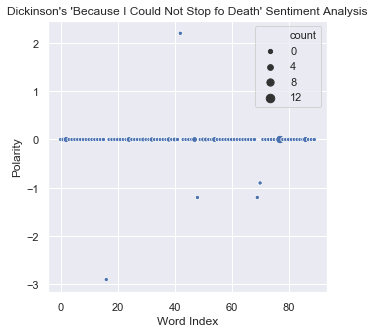

In [7]:
#Attempt2: scatterplot
#modify data to include count
def add_count(df):
    df['count']=1
    return df.groupby(['words', 'polarity'])["count"].sum().reset_index()
dickinson1_count=add_count(dickinson1)

sns.set(rc={'figure.figsize':(5,5)})
scat1=sns.scatterplot(y="polarity", x=dickinson1_count.index, size="count", data=dickinson1_count, s=200)
plt.title("Dickinson's 'Because I Could Not Stop fo Death' Sentiment Analysis")
plt.xlabel("Word Index")
plt.ylabel("Polarity")

## Test on Longer News Articles

In [8]:
news1=text_dataframe("news1.txt")
news1=add_polarity(news1, sent)
news1=add_count(news1)
news1

,words,polarity,count
0,george,0.0,1
1,scum,0.0,1
2,46,0.0,1
3,49ers,0.0,1
4,a,0.0,20
...,...,...,...
303,while,0.0,5
304,who,0.0,4
305,with,0.0,5
306,yanked,0.0,1


Text(0, 0.5, 'Polarity')

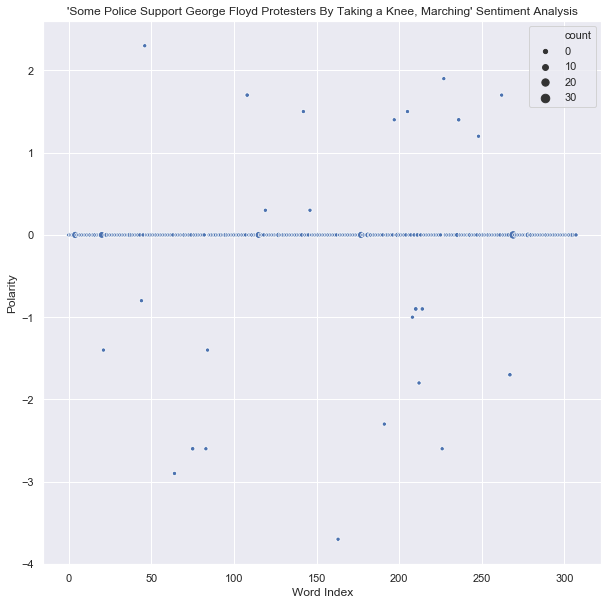

In [9]:
sns.set(rc={'figure.figsize':(10,10)})
scat1=sns.scatterplot(y="polarity", x=news1.index, size="count", data=news1, s=200)
plt.title("'Some Police Support George Floyd Protesters By Taking a Knee, Marching' Sentiment Analysis")
plt.xlabel("Word Index")
plt.ylabel("Polarity")

Text(0, 0.5, 'Words')

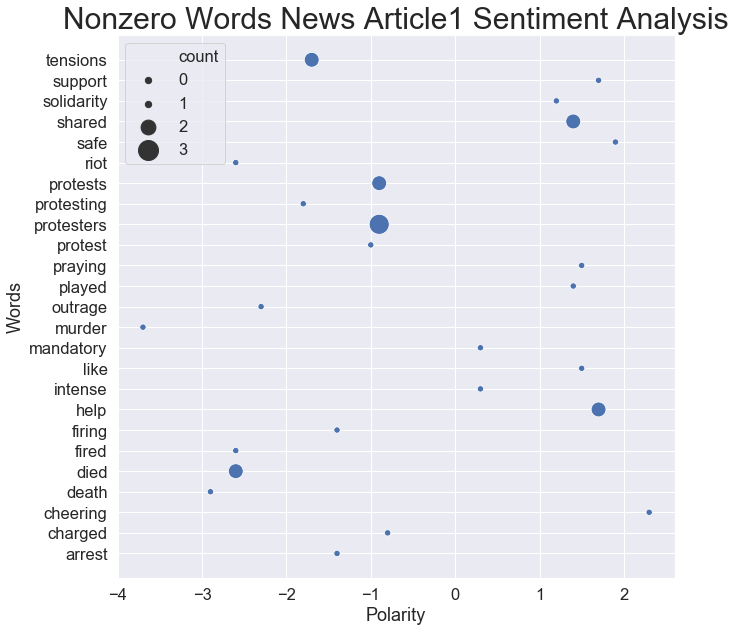

In [10]:
#What happens if we single out non-zero words
news1_nonzero = news1[news1['polarity']!=0]

sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.5)
scat1=sns.scatterplot(x="polarity", y="words", size="count", 
                      data=news1_nonzero, sizes=(40,400))
plt.title("Nonzero Words News Article1 Sentiment Analysis", fontsize=30)
plt.xlabel("Polarity")
plt.ylabel("Words")

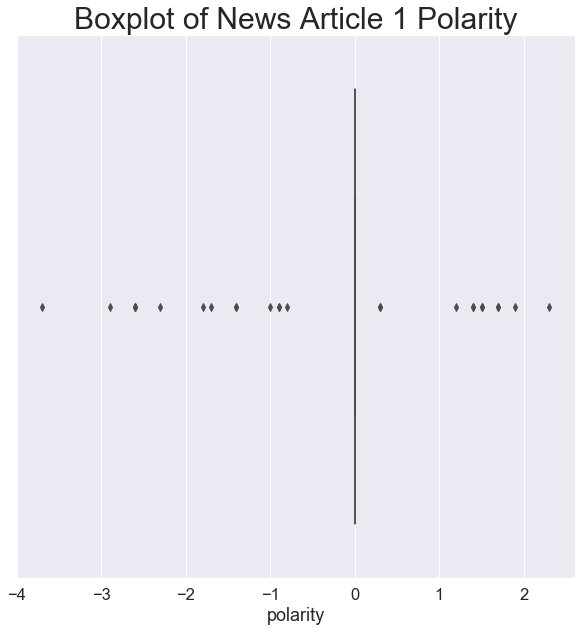

In [11]:
#Can we use a boxplot to portray an average
np.mean(news1["polarity"])
plt.title("Boxplot of News Article 1 Polarity", fontsize=30)
sns.boxplot(x="polarity", data=news1, )

## Exploring Analysis with User Input

In [12]:
from io import StringIO

In [13]:
#user_text_string takes in a custom string message to prompt user input
def user_text_analysis(message):
    answer=input(message)
    answerStr=StringIO(answer)
    answerDF=pd.read_csv(answerStr, sep=" ", header=None)
    answerDF=answerDF.T
    answerDF.columns=['words']
    answerDF=add_polarity(answerDF, sent)
    answerDF=add_count(answerDF)
    return answerDF
    
ansDF=user_text_analysis("How are you feeling today?")

How are you feeling today?wertyujklnfdsa fhdjslka jflewafkdjlas; e


Text(0, 0.5, 'Polarity')

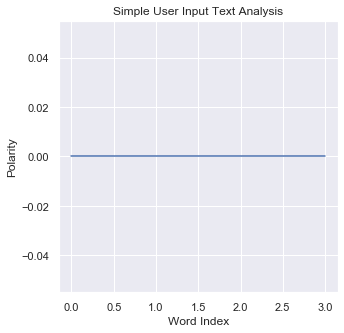

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
scat1=sns.lineplot(y="polarity", x=ansDF.index, data=ansDF)
plt.title("Simple User Input Text Analysis")
plt.xlabel("Word Index")
plt.ylabel("Polarity")

In [16]:
ans1DF=user_text_analysis("What is your agenda today?")

What is your agenda today?good excellent fun


Text(0, 0.5, 'Polarity')

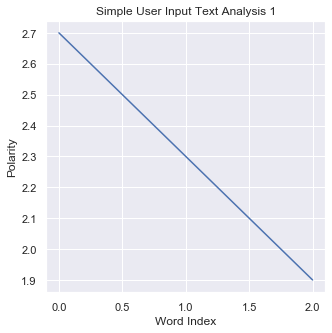

In [17]:
sns.set(rc={'figure.figsize':(5,5)})
scat1=sns.lineplot(y="polarity", x=ans1DF.index, data=ans1DF)
plt.title("Simple User Input Text Analysis 1")
plt.xlabel("Word Index")
plt.ylabel("Polarity")